# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


637

In [4]:
#Forming DF and Printing Logs
#Date of API run = 7/19/19
#===========================================================================

#Convert cities list to DF
cities_df = pd.DataFrame(cities)
cities_df.columns = ["City"]
cities_df.head()

#Store data from API here 
weather_data = []
weather_df = pd.DataFrame(weather_data)
weather_df["City"] = "" 
weather_df["Cloudiness"] = ""
weather_df["Country"] = ""
weather_df["Date"] = ""
weather_df["Humidity"] = ""
weather_df["Lat"] = ""
weather_df["Lng"] = ""
weather_df["Max Temp"] = ""
weather_df["Wind Speed"] = ""

#base url for API 
url_base = "http://api.openweathermap.org/data/2.5/weather?"

#track record number for each city the API outputs data for
record_number = 1

#Run API, store data, and print logs 
for index,row in cities_df.iterrows():
    city_name = row["City"]
    
    query_url = url_base + "appid=" + api_key + "&q=" + city_name
    response = requests.get(query_url)
    data = response.json()
    
    try:  
        data["name"]
        print(f"Processing Record {record_number} | {city_name}")
        print(query_url)
        record_number = record_number + 1
        
        weather_df.loc[index, "City"] = data["name"]
        weather_df.loc[index, "Cloudiness"] = data["clouds"]["all"]
        weather_df.loc[index, "Country"] = data["sys"]["country"]
        weather_df.loc[index, "Date"] = data["dt"]
        weather_df.loc[index, "Humidity"] = data["main"]["humidity"]
        weather_df.loc[index, "Lat"] = data["coord"]["lat"]
        weather_df.loc[index, "Lng"] = data["coord"]["lon"]
        weather_df.loc[index, "Max Temp"] = data["main"]["temp_max"]
        weather_df.loc[index, "Wind Speed"] = data["wind"]["speed"]
    
    except (KeyError):
        print("City not found. Skipping...")
    
weather_df = weather_df.reset_index()
del weather_df["index"]


Processing Record 1 | ponta do sol
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=ponta do sol
Processing Record 2 | jamestown
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=jamestown
Processing Record 3 | ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=ushuaia
Processing Record 4 | mount gambier
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=mount gambier
Processing Record 5 | omboue
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=omboue
City not found. Skipping...
Processing Record 6 | mkushi
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=mkushi
Processing Record 7 | exeter
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=exeter
Processing Record 8 | esperance
http://api.openweathermap.org/data/2.5

Processing Record 65 | narsaq
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=narsaq
Processing Record 66 | kruisfontein
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=kruisfontein
Processing Record 67 | hambantota
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=hambantota
Processing Record 68 | kavieng
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=kavieng
Processing Record 69 | puerto ayora
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=puerto ayora
City not found. Skipping...
Processing Record 70 | wabrzezno
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=wabrzezno
City not found. Skipping...
Processing Record 71 | saint-pierre
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=saint-pierre
Processing Record

Processing Record 127 | hohhot
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=hohhot
Processing Record 128 | saint-philippe
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=saint-philippe
Processing Record 129 | vila velha
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=vila velha
Processing Record 130 | codrington
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=codrington
Processing Record 131 | mingshui
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=mingshui
Processing Record 132 | bethel
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=bethel
Processing Record 133 | osmena
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=osmena
Processing Record 134 | felipe carrillo puerto
http://api.openweathermap.org/data/

Processing Record 189 | ilo
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=ilo
Processing Record 190 | puerto baquerizo moreno
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=puerto baquerizo moreno
Processing Record 191 | la ronge
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=la ronge
Processing Record 192 | vostok
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=vostok
Processing Record 193 | beringovskiy
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=beringovskiy
Processing Record 194 | vanavara
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=vanavara
Processing Record 195 | chicama
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=chicama
City not found. Skipping...
Processing Record 196 | kaitangata
http:

Processing Record 252 | amapa
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=amapa
Processing Record 253 | avera
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=avera
Processing Record 254 | shaki
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=shaki
Processing Record 255 | saldanha
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=saldanha
Processing Record 256 | saint anthony
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=saint anthony
City not found. Skipping...
Processing Record 257 | ganzhou
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=ganzhou
Processing Record 258 | vila franca do campo
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=vila franca do campo
Processing Record 259 | lodwar
http://api.openwe

Processing Record 314 | malartic
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=malartic
Processing Record 315 | mahebourg
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=mahebourg
Processing Record 316 | wanaka
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=wanaka
Processing Record 317 | coquimbo
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=coquimbo
Processing Record 318 | deputatskiy
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=deputatskiy
Processing Record 319 | samarkand
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=samarkand
Processing Record 320 | ruteng
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=ruteng
Processing Record 321 | dalmatovo
http://api.openweathermap.org/data/2.5/weather?appid=d

Processing Record 375 | pedasi
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=pedasi
Processing Record 376 | hamilton
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=hamilton
Processing Record 377 | maryville
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=maryville
Processing Record 378 | sangar
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=sangar
Processing Record 379 | port hedland
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=port hedland
Processing Record 380 | port lincoln
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=port lincoln
Processing Record 381 | petrolina
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=petrolina
Processing Record 382 | caravelas
http://api.openweathermap.org/data/2.5/weath

Processing Record 437 | llanes
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=llanes
Processing Record 438 | cascais
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=cascais
Processing Record 439 | sinnamary
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=sinnamary
Processing Record 440 | karratha
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=karratha
Processing Record 441 | okha
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=okha
Processing Record 442 | ixtapa
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=ixtapa
Processing Record 443 | dingle
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=dingle
Processing Record 444 | bereda
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e

Processing Record 498 | bartica
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=bartica
Processing Record 499 | marrakesh
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=marrakesh
Processing Record 500 | boralday
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=boralday
City not found. Skipping...
Processing Record 501 | aviles
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=aviles
Processing Record 502 | batticaloa
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=batticaloa
Processing Record 503 | douglas
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=douglas
Processing Record 504 | honiara
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=honiara
Processing Record 505 | aranos
http://api.openweathermap.org/data/

Processing Record 560 | ewa beach
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=ewa beach
Processing Record 561 | alofi
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=alofi
Processing Record 562 | guadalupe y calvo
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=guadalupe y calvo
Processing Record 563 | macamic
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=macamic
Processing Record 564 | francisco sa
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=francisco sa
Processing Record 565 | luau
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=luau
Processing Record 566 | castelo do piaui
http://api.openweathermap.org/data/2.5/weather?appid=de12d20e82081bcbbc41d1b42e4b12de&q=castelo do piaui
Processing Record 567 | kon tum
http://api.openweathermap.org/

In [5]:
#DF of API output 
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ponta do Sol,5,BR,1563579073,65,-20.63,-46,286.059,2.21
1,Jamestown,0,AU,1563578989,43,-33.21,138.6,286.559,7.77
2,Ushuaia,20,AR,1563578968,64,-54.81,-68.31,276.15,1.5
3,Mount Gambier,31,AU,1563578667,66,-37.83,140.78,283.15,7.7
4,Omboue,100,GA,1563579412,88,-1.57,9.26,296.759,4.34


In [6]:
#Export to csv file
weather_csv = weather_df.to_csv(r'C:\Users\Nader\OneDrive\Education\SMU Data Science\GitHub Repository\API HW 6\Python_APIs_HW_6\weather.csv',index=False)


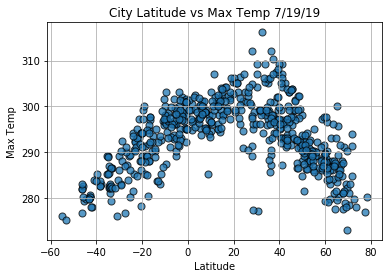

In [7]:
#Scatter Graph: Lat vs Max Temp 
#------------------------------------------------------------------
x_axis = weather_df["Lat"]
y_axis = weather_df["Max Temp"]

plt.scatter(x_axis, y_axis, marker="o", edgecolors="black", s=50, alpha=0.75)
plt.grid()
plt.title("City Latitude vs Max Temp 7/19/19")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.savefig("Lat_vs_Max_Temp.png")
plt.show()



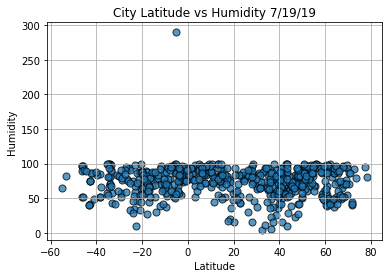

In [8]:
#Lat vs Humdity Graph
#-------------------------------------------------------------
x_axis = weather_df["Lat"]
y_axis = weather_df["Humidity"]

plt.scatter(x_axis, y_axis, marker="o", edgecolors="black", s=50, alpha=0.75)
plt.grid()
plt.title("City Latitude vs Humidity 7/19/19")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.savefig("Lat_vs_Humidity.png")
plt.show()

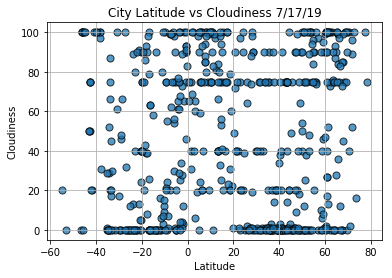

In [9]:
#Lat vs Cloudiness graph
#----------------------------------------------------
x_axis = weather_df["Lat"]
y_axis = weather_df["Cloudiness"]

plt.scatter(x_axis, y_axis, marker="o", edgecolors="black", s=50, alpha=0.75)
plt.grid()
plt.title("City Latitude vs Cloudiness 7/17/19")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.savefig("Lat_vs_Cloudiness.png")
plt.show()

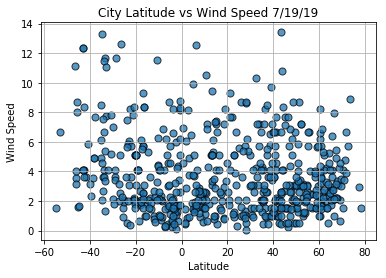

In [10]:
#Lat vs Wind Speed Graph
#----------------------------------------------------------------
x_axis = weather_df["Lat"]
y_axis = weather_df["Wind Speed"]

plt.scatter(x_axis, y_axis, marker="o", edgecolors="black", s=50, alpha=0.75)
plt.grid()
plt.title("City Latitude vs Wind Speed 7/19/19")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.savefig("Lat_vs_Wind_Speed.png")
plt.show()